In [10]:
! pip3 install pandas
! pip3 install matplotlib.pyplot
! pip3 install plotly.express
! pip3 install openpyxl
! pip3 install petl

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [11]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import petl as etl
import glob as glob
import os

In [12]:
branch_df = pd.read_csv('final_consumer_behaviour_df.csv')

# branch_df.info(verbose=False, memory_usage='deep')

/Users/jontylees/Python/final-project/data_transformation/.env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
branch_df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'hour', 'amount_in_gbp',
       'branch_name', 'quantity', 'product', 'region', 'county',
       'established_on', 'manufactuter', 'category'],
      dtype='object')

### Track the most purchased and least purchased products & product categories overall, per region and per county

In [14]:
product_df = branch_df[['region', 'county', 'product', 'quantity','category']]


In [15]:
product_df.shape

(83077783, 5)

In [16]:
regional_product = product_df. groupby(['region', 'county', 'product','category'])['quantity'].sum().sort_values(ascending=False).reset_index()

In [17]:
regional_product.shape

(8228, 5)

In [18]:
regional_product.to_csv('product_df.csv')

In [19]:
regional_product_search = regional_product.loc[regional_product['county'] == 'East Lindsey']
top_product = regional_product_search.groupby('category')['quantity'].max(5).reset_index()
bottom_product = regional_product_search.groupby('category')['quantity'].max(5).reset_index()


In [20]:
top_product.head(5)

,category,quantity
0,appliances,2942511.0
1,bakery,2971881.0
2,clothing,2965899.0
3,computing,2968872.0
4,dairy,2989908.0


Text(0.5, 1.0, 'Northern Ireland Most Purchased')

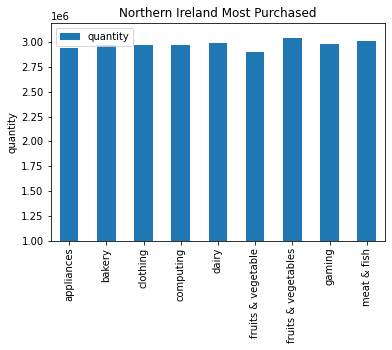

In [21]:
top_product.plot.bar(x=('category'), y=["quantity"])
plt.xlabel(None)
plt.ylabel('quantity')
plt.ylim(bottom=1000000)
plt.title('Northern Ireland Most Purchased')

### Track the best performing branches overall per region and per county (performance is measured in both item quantity sold and monetary value of sales made)

In [22]:
performance_df = branch_df[['region', 'county', 'branch_name', 'quantity','amount_in_gbp']]


In [23]:
regional_performance = performance_df.groupby(['region', 'county', 'branch_name'])[['quantity', 'amount_in_gbp']].sum().sort_values(by='region', ascending=False).reset_index()

regional_performance.to_csv('performance_df.csv')

In [68]:
regional_performance['best_performing'] = regional_performance.quantity + regional_performance.amount_in_gbp
regional_performance.sort_values(by='best_performing', ascending=False)
regional_performance['region'].value_counts().sort_values(ascending=False)

South East England          13
Wales                        8
East Midlands                8
Scotland                     7
East of England              6
Yorkshire and the Humber     5
West Midlands                5
North West England           5
London                       5
South West England           3
Northern Ireland             2
North East England           2
Name: region, dtype: int64

<AxesSubplot:xlabel='branch_name'>

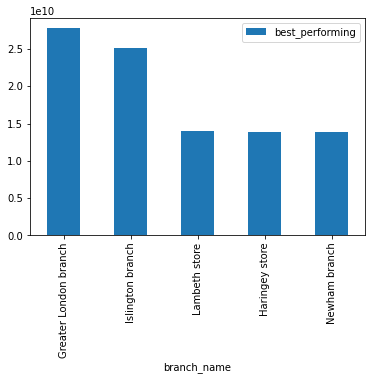

In [25]:
top_regional_performance = regional_performance.loc[regional_performance['region'] == 'London'].nlargest(5,'best_performing')
top_regional_performance.plot.bar(x=('branch_name') , y=['best_performing'])

Greater London    1
Islington         1
Lambeth           1
Haringey          1
Newham            1
Name: county, dtype: int64

### Per hour sales for the top 10 branches of 2021 identified

In [26]:
branch_df.head(3)

,Unnamed: 0,year,month,day,hour,amount_in_gbp,branch_name,quantity,product,region,county,established_on,manufactuter,category
0,166,2012.0,1.0,10.0,0.0,367.50,Armagh outlet,125.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
1,370,2012.0,1.0,10.0,0.0,44.10,Armagh outlet,15.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish
2,411,2012.0,1.0,10.0,0.0,311.64,Armagh outlet,106.0,21 day mature ribeye steak,Northern Ireland,Armagh,2012.0,farmer jack,meat & fish


In [27]:
per_hour_df = branch_df[['branch_name', 'year', 'hour', 'amount_in_gbp']]


In [28]:
per_hour = per_hour_df.groupby(['year', 'branch_name', 'hour'])['amount_in_gbp'].sum().sort_values(ascending=False).reset_index()



In [29]:
per_hour.to_csv('per_hour_df.csv')

In [30]:
year_filtered_df = per_hour.loc[per_hour['year']== 2020]

In [31]:
year_filtered_df.sort_values(by=['branch_name', 'hour'])

,year,branch_name,hour,amount_in_gbp
5520,2020.0,Armagh outlet,0.0,60160249.41
2777,2020.0,Armagh outlet,1.0,70902546.13
9246,2020.0,Armagh outlet,2.0,52887101.78
10354,2020.0,Armagh outlet,3.0,50955828.40
4728,2020.0,Armagh outlet,4.0,62210362.02
...,...,...,...,...
13534,2020.0,York outlet,19.0,44943966.88
7611,2020.0,York outlet,20.0,55833495.25
4518,2020.0,York outlet,21.0,62792650.35
4560,2020.0,York outlet,22.0,62704732.18


In [32]:
branch_hour_grouped_df = year_filtered_df.groupby(['branch_name', 'hour'])['amount_in_gbp'].sum().reset_index()
branch_hour_grouped_df.head(5)

,branch_name,hour,amount_in_gbp
0,Armagh outlet,0.0,60160249.41
1,Armagh outlet,1.0,70902546.13
2,Armagh outlet,2.0,52887101.78
3,Armagh outlet,3.0,50955828.40
4,Armagh outlet,4.0,62210362.02


In [33]:
top_branches = branch_hour_grouped_df.groupby('branch_name')['amount_in_gbp'].sum().reset_index()
top_branches = top_branches.rename(columns={"amount_in_gbp":"total_gbp"})

In [72]:
merged_per_hour = branch_hour_grouped_df.merge(top_branches.set_index('branch_name'), on='branch_name').reset_index()

top_merged_per_hour = merged_per_hour.sort_values(['total_gbp', 'hour'], ascending=True).tail(240)
bottom_merged_per_hour = merged_per_hour.sort_values(['total_gbp', 'hour'], ascending=True).head(240)

<AxesSubplot:xlabel='hour'>

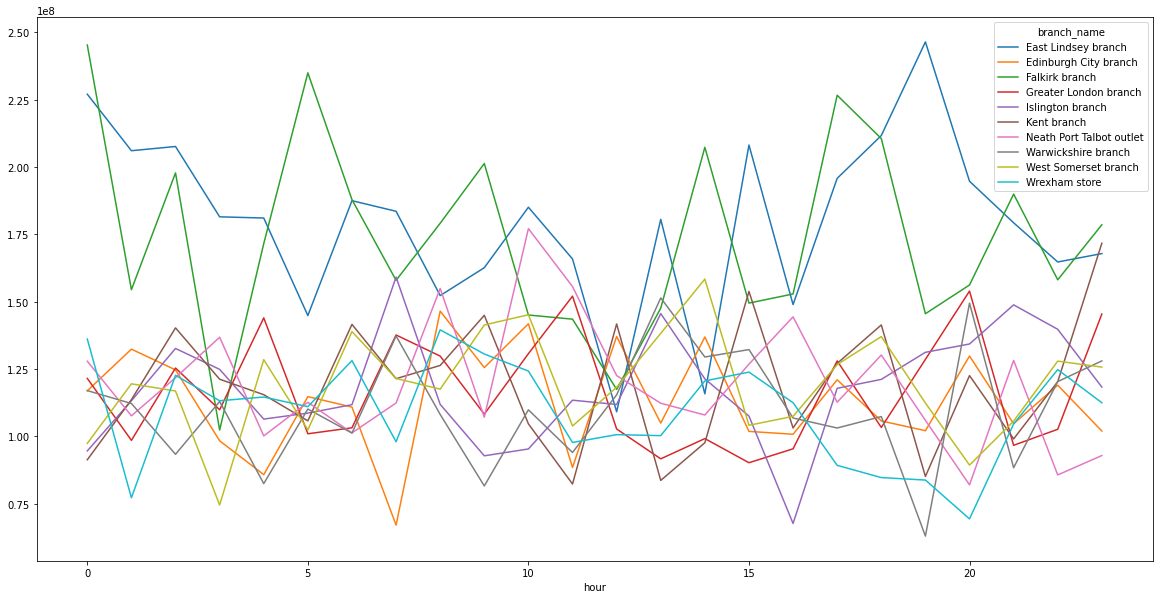

In [73]:
top_merged_per_hour = top_merged_per_hour.pivot(index='hour', columns='branch_name', values='amount_in_gbp')
top_merged_per_hour.plot(figsize=(20,10))

<AxesSubplot:xlabel='hour'>

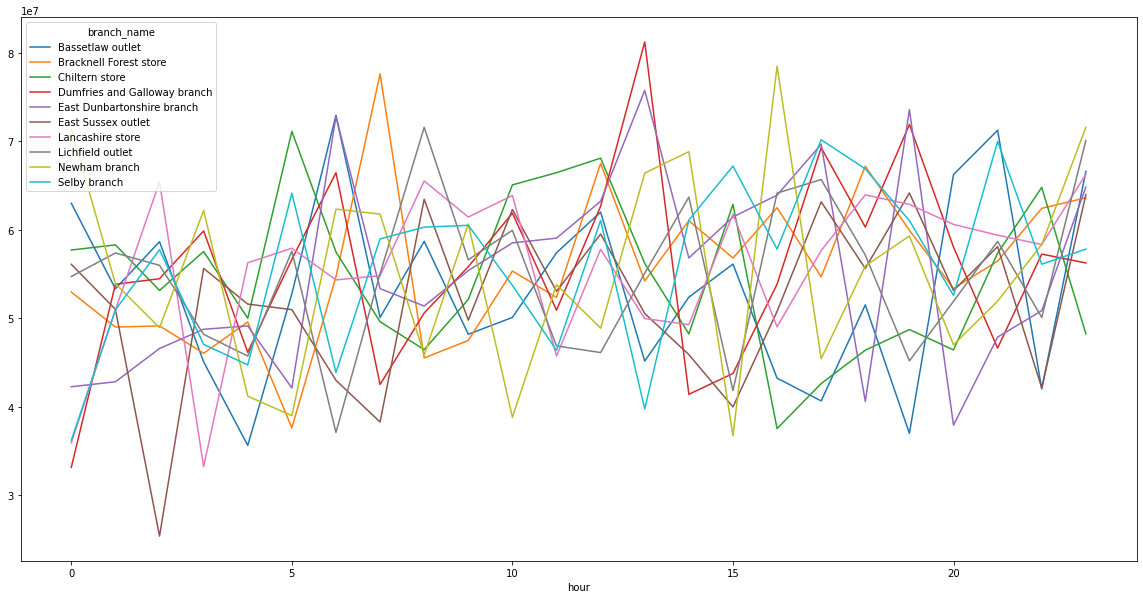

In [74]:
bottom_merged_per_hour = bottom_merged_per_hour.pivot(index='hour', columns='branch_name', values='amount_in_gbp')
bottom_merged_per_hour.plot(figsize=(20,10))

### Identify the top 10 and bottom 10 profitable branches and indicate how profitable they are.

In [37]:
profit_df = branch_df[['branch_name', 'amount_in_gbp','year']]

In [38]:
profitable_branches_df = profit_df.groupby(['year', 'branch_name'])['amount_in_gbp'].sum().reset_index()

In [39]:
profitable_branches_df.to_csv('profitable_branches_df.csv')

In [100]:
year_filtered_df = profitable_branches_df.loc[profitable_branches_df['year']== 2020]

In [101]:
year_filtered_df.sort_values(by=['year','amount_in_gbp'],ascending=False)

,year,branch_name,amount_in_gbp
652,2020.0,East Lindsey branch,4.308087e+09
656,2020.0,Falkirk branch,4.161411e+09
675,2020.0,Neath Port Talbot outlet,2.866620e+09
699,2020.0,West Somerset branch,2.858195e+09
668,2020.0,Kent branch,2.855607e+09
...,...,...,...
650,2020.0,East Dunbartonshire branch,1.328065e+09
672,2020.0,Lichfield outlet,1.315833e+09
644,2020.0,Chiltern store,1.311946e+09
636,2020.0,Bassetlaw outlet,1.279487e+09


In [120]:
top_year_filtered_df = year_filtered_df.head(10)
bottom_year_filtered_df = year_filtered_df.tail(10)
top_year_filtered_df

,year,branch_name,amount_in_gbp
633,2020.0,Armagh outlet,1.400684e+09
634,2020.0,Bargoed outlet,1.472373e+09
635,2020.0,Barry outlet,1.445593e+09
636,2020.0,Bassetlaw outlet,1.279487e+09
637,2020.0,Bedford Borough branch,1.376566e+09
638,2020.0,Bedfordshire store,1.460154e+09
639,2020.0,Bracknell Forest store,1.336547e+09
640,2020.0,Bridgend outlet,1.409899e+09
641,2020.0,Castle Point outlet,1.395763e+09
642,2020.0,Ceredigion store,1.387862e+09


In [103]:
branch_expenses_df = pd.read_csv('branch_expenses.csv')

In [104]:
branch_expenses_df
branch_expenses_df['total_expenses'] = branch_expenses_df.apply(lambda row: row.operational_cost + row.staff_bonuses + row.misc_expenses + row.waste_cost, axis=1)

In [105]:
total_branch_expenses =branch_expenses_df.groupby('branch_name')['total_expenses'].sum().reset_index()

In [106]:
branch_total_df = top_year_filtered_df.merge(total_branch_expenses.set_index('branch_name'), on='branch_name') 

In [107]:
branch_total_df['profitability'] = branch_total_df.apply(lambda row: row.amount_in_gbp - row.total_expenses, axis=1)

In [108]:
branch_total_df['profitability'] = branch_total_df.amount_in_gbp - branch_total_df.total_expenses

In [109]:
branch_total_df.sort_values(by='profitability', ascending=False)

,year,branch_name,amount_in_gbp,total_expenses,profitability
1,2020.0,Bargoed outlet,1.472373e+09,1381004.0,1.470992e+09
5,2020.0,Bedfordshire store,1.460154e+09,1398615.0,1.458755e+09
2,2020.0,Barry outlet,1.445593e+09,1573467.0,1.444020e+09
7,2020.0,Bridgend outlet,1.409899e+09,1559067.0,1.408340e+09
0,2020.0,Armagh outlet,1.400684e+09,1423326.0,1.399260e+09
8,2020.0,Castle Point outlet,1.395763e+09,1685099.0,1.394078e+09
9,2020.0,Ceredigion store,1.387862e+09,1796323.0,1.386066e+09
4,2020.0,Bedford Borough branch,1.376566e+09,1594466.0,1.374972e+09
6,2020.0,Bracknell Forest store,1.336547e+09,1584912.0,1.334962e+09
3,2020.0,Bassetlaw outlet,1.279487e+09,1725878.0,1.277761e+09


In [110]:
1.159447e+09 + 1710500.0

1161157500.0

In [121]:
branch_total_df.sort_values(by='profitability', ascending=False)
top_profitability_stores = branch_total_df.head(10)
bottom_profitability_stores = branch_total_df.tail(10)
top_profitability_stores


,year,branch_name,amount_in_gbp,total_expenses,profitability
0,2020.0,Armagh outlet,1.400684e+09,1423326.0,1.399260e+09
1,2020.0,Bargoed outlet,1.472373e+09,1381004.0,1.470992e+09
2,2020.0,Barry outlet,1.445593e+09,1573467.0,1.444020e+09
3,2020.0,Bassetlaw outlet,1.279487e+09,1725878.0,1.277761e+09
4,2020.0,Bedford Borough branch,1.376566e+09,1594466.0,1.374972e+09
5,2020.0,Bedfordshire store,1.460154e+09,1398615.0,1.458755e+09
6,2020.0,Bracknell Forest store,1.336547e+09,1584912.0,1.334962e+09
7,2020.0,Bridgend outlet,1.409899e+09,1559067.0,1.408340e+09
8,2020.0,Castle Point outlet,1.395763e+09,1685099.0,1.394078e+09
9,2020.0,Ceredigion store,1.387862e+09,1796323.0,1.386066e+09


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Armagh outlet'),
  Text(1, 0, 'Bargoed outlet'),
  Text(2, 0, 'Barry outlet'),
  Text(3, 0, 'Bassetlaw outlet'),
  Text(4, 0, 'Bedford Borough branch'),
  Text(5, 0, 'Bedfordshire store'),
  Text(6, 0, 'Bracknell Forest store'),
  Text(7, 0, 'Bridgend outlet'),
  Text(8, 0, 'Castle Point outlet'),
  Text(9, 0, 'Ceredigion store')])

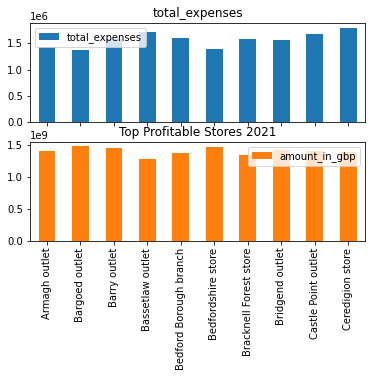

In [112]:
top_profitability_stores.plot.bar(x=('branch_name'), y=['total_expenses', 'amount_in_gbp'], rot=0, subplots=True)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Top Profitable Stores 2021')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Least Profitable Stores 2021')

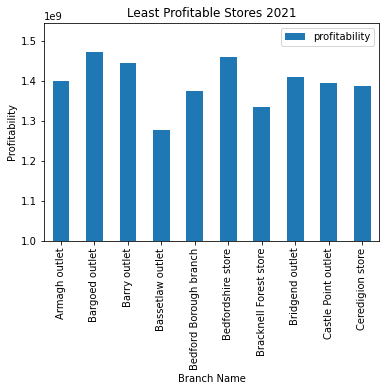

In [113]:
bottom_profitability_stores.plot.bar(x=('branch_name'), y=['profitability'])
plt.ylim(bottom= 1.00000e+09)
plt.xlabel('Branch Name')
plt.ylabel('Profitability')
plt.title('Least Profitable Stores 2021')

In [114]:
product_df = pd.read_csv('product_df.csv')

In [115]:
regional_product_search = product_df.loc[product_df['region'] == 'London']
top_product = regional_product_search.groupby('product')['quantity'].max(5).reset_index()
bottom_product = regional_product_search.groupby('product')['quantity'].max().reset_index()
top_product = top_product.nlargest(5,'quantity')
bottom_product = bottom_product.nsmallest(5,'quantity')
# figure = px.bar(top_product,x='product', y= 'quantity')
# figure

In [116]:
bottom_product.head()

,product,quantity
4,Blueberry yoghurt,2037270.0
97,plastic sunshades,2041468.0
22,apple macbook air mid 2009,2047696.0
72,grey blazers,2049156.0
69,garlic,2056114.0


In [117]:
branch_list_df = etl.fromxlsx('data/branch_list.xlsx')

In [118]:
etl.tocsv(branch_list_df, 'branch_list_df.csv')

In [119]:
branch_list_df.region

AttributeError: 'XLSXView' object has no attribute 'region'